In [ ]:
'''
Hello!
    My name is Sophie, and this is my first time attempting to train a machine learning model. 
    I have only trained this model on 198 data points making the accuracy pretty rough, but this project is really
    just about me learning the ML process and experimenting.
    My hope for this program is to allow people to input tweets/text from their trusted news outlets/sources to see if they may
    be politically skewed or biased. In determining if a trusted news source is consistently producing "0" or biased content, 
    my hope is that users will look for less biased sources to form more educated and well-rounded beliefs/opinions.

'''

In [1]:
# Preprocessing Code

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)


NumPy version: 1.26.4
TensorFlow version: 2.18.0


In [3]:
import pandas as pd
import re

# Load the dataset
dataset = pd.read_csv("Tweet_Training_Dataset.csv")

# Rename and clean columns (replace with appropriate column names if needed)
dataset.columns = ['text', 'label']

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#\w+|[^A-Za-z\s]', '', text)  # Remove special chars
    return text.strip()

# In the preprocessing step, I'm removing special characters with [^A-Za-z\s]. This removes punctuation like ! or ?, which may carry sentiment. I may consider retaining such characters...

# Apply preprocessing
dataset['text'] = dataset['text'].apply(preprocess_text)

# Convert to TensorFlow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices((dataset['text'].values, dataset['label'].values))

# Shuffle, batch, and prefetch the dataset
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
tf_dataset = tf_dataset.shuffle(len(dataset)).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

# Check a sample batch
for text_batch, label_batch in tf_dataset.take(1):
    print(text_batch.numpy()[:5])
    print(label_batch.numpy()[:5])


[b'i cant wait to watch you fade into obscurity when you go to prison'
 b'presidentelect trump has picked karoline leavitt to be white house press secretary'
 b'could vice president kamala harris make a run for california governor in  years'
 b'brazils first lady aims explicit joke at key target of husbands administration fk you elon musk'
 b'the rest of american people who can wake up will soon   soon the left will go back to war with reality and use all of the same smearfear tactics that will no longer work as good things begin to happen with this team the democrats will become the complete parody of themselves just as the msm has become the rest have been so abused that they are trapped in the fear of the party']
[0 1 1 0 0]


2024-12-09 19:26:23.062049: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:
print("Dataset shape:", dataset.shape)
print("Number of batches:", len(tf_dataset))

for text_batch, label_batch in tf_dataset.take(1):
    print("Text batch sample:", text_batch.numpy())
    print("Label batch sample:", label_batch.numpy())


Dataset shape: (198, 2)
Number of batches: 7
Text batch sample: [b'more than a dozen republicans who were fake electors in  will serve as official trump electors in battleground states this year'
 b'ukraine has fired usmade longrange missiles into russias bryansk region russian state media reports'
 b'thats right virginia ag \n\n r shares his nobrainer prediction for the trump presidency explaining how the incoming administration will be fundamentally different from president bidens read more'
 b'im grateful i was able to do my part to save our country by helping to get you elected'
 b'kamala harris and donald trump remain neck and neck in georgia and north carolina where most likely voters have already cast ballots according to new cnn polls'
 b'barely alive from new york snl ratings tanked during  election season report'
 b'the biden white houses decisionmaking has been horrendous every step of the way'
 b'as soon as tomorrow the house will vote on a bill that would give the incoming

2024-12-09 19:26:23.071755: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Verify Labels: Double-check the label distribution to ensure balance:
print(dataset['label'].value_counts())


label
0    113
1     85
Name: count, dtype: int64


In [6]:
# My dataset is pretty imbalanced which definitely causes my model to struggle

# If I had more time, my next steps would be to oversample the minority class or using techniques like SMOTE.

In [7]:
# Text Vectorization: Since TensorFlow operates on numeric data, I need to convert the text into a suitable numerical format (e.g., tokenization).

from tensorflow.keras.layers import TextVectorization

# Define TextVectorization layer
max_features = 10000  # Vocabulary size
sequence_length = 100  # Max sequence length
vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

# Adapt the vectorization layer to the text data
vectorize_layer.adapt(dataset['text'])

# Apply the vectorization
tf_dataset = tf_dataset.map(lambda x, y: (vectorize_layer(x), y)) # This step applies the vectorize_layer to all input text before training.


In [8]:
# I did use a tokenizer during training, but instead of a traditional Tokenizer (e.g., from keras.preprocessing.text), 
# I used a TextVectorization layer as part of my preprocessing pipeline. This layer acts as the tokenizer in my workflow.

In [54]:
# Model Building: Build and compile my TensorFlow model:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model_16 = Sequential([
    #Embedding(input_dim=max_features, output_dim=16, input_length=sequence_length),
    Embedding(input_dim=max_features, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model_16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
# Training: Train my model using the tf_dataset:

model_16.fit(tf_dataset, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5560 - loss: 0.6913  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5508 - loss: 0.6875 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5572 - loss: 0.6853 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 0.6794 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 0.6808 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5656 - loss: 0.6819 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5602 - loss: 0.6826 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5573 - loss: 0.6830 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5679 - loss: 0.6784 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5746 - loss: 0.6754 


In [11]:
# Conclusions from training

# Accuracy:
# My model's accuracy starts around 59% and fluctuates slightly during training, ending at ~58.8%.
# Accuracy values around 50-60% suggest the model is not learning effectively or is struggling with the data.

# Loss:
# The loss metric starts at 0.6915 and reduces slightly to 0.6740 by the end of 10 epochs.
# A high and stagnant loss value could indicate underfitting (the model is not learning enough to distinguish between the classes).

# Fluctuations:
# The accuracy and loss fluctuate significantly between epochs (e.g., dropping in some epochs and improving in others). This could point to:
# 1) Data Issues: Noise or imbalance in my dataset.
# 2) Model Simplicity: The model architecture might be too simple for the task.
# 3) Batch Size: A small dataset with batch processing could introduce variability.

In [12]:
# Next Steps Below:

# 1) Data Quality: Inspect the dataset for mislabeled data, redundancy, or incomplete preprocessing.

In [13]:
# 2) Experimenting with Model Architecture
# Add Layers: My model is very simple. Trying to add more layers or units:

In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(input_dim=max_features, output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [15]:
# 3) Experiment with Hyperparameters
# Learning Rate: Adjust the learning rate for better optimization.

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
# 4) Batch Size: Experiment with batch sizes (e.g., 16, 64).

In [17]:
# 5) Use Pretrained Embeddings
# Considered using pretrained embeddings like GloVe or Word2Vec for better text representations:

#embedding_dim = 100
#embeddings_index = {}
#with open('glove.6B.100d.txt', 'r') as f:
    #for line in f:
        #values = line.split()
        #word = values[0]
       # coefs = np.asarray(values[1:], dtype='float32')
        #embeddings_index[word] = coefs


In [18]:
# 6) Evaluate Model Performance
# Use a validation split to monitor overfitting:

# model.fit(tf_dataset, validation_split=0.2, epochs=10)

In [58]:
# Evaluate using metrics like precision, recall, and F1-score:
from sklearn.metrics import classification_report

y_true = dataset['label']
y_pred = (model.predict(tf_dataset).flatten() > 0.5).astype(int)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_true, y_pred))

# classification_report uses NumPy arrays, but I am directly passing predictions (y_pred) on a TensorFlow dataset. Ensure that y_true and y_pred have matching dimensions and types.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       113
           1       0.00      0.00      0.00        85

    accuracy                           0.57       198
   macro avg       0.29      0.50      0.36       198
weighted avg       0.33      0.57      0.41       198



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
# 7) Data Augmentation
# I am limited by data size, so could apply text data augmentation techniques using libraries like NLPAug.

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5126 - loss: 0.6929  
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6059 - loss: 0.6859 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5840 - loss: 0.6853 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - loss: 0.6872 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 0.6807 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5961 - loss: 0.6718 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5649 - loss: 0.6832 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5392 - loss: 0.6830 
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5507 - loss: 0.6875 
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5686 - loss: 0.6904 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5883 - loss: 0.6759 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 0.6783 


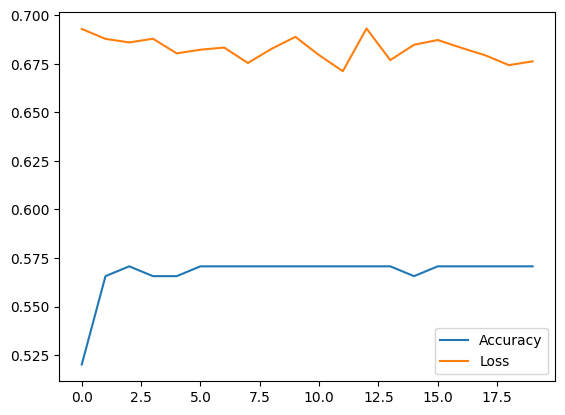

In [21]:
# 8) Tune Training Parameters
# Train for more epochs and monitor learning curves to identify underfitting or overfitting:

history = model.fit(tf_dataset, epochs=20)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()


In [22]:
# DEPLOYMENT/TESTING

In [24]:
# Save the model (includes the vectorization layer)
model.save('my_model_with_vectorizer.keras')  # Or use '.h5'

# Save the vectorizer separately if needed
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorize_layer, f)


In [28]:

# Load the model with the vectorization layer
from tensorflow.keras.models import load_model
model = load_model('my_model_with_vectorizer.keras')

# OR load just the vectorizer if saved separately
with open('vectorizer.pkl', 'rb') as f:
    vectorize_layer = pickle.load(f)


In [68]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample text for prediction
sample_text = "Election day is tomorrow! Don’t forget to vote."

# Preprocess the sample text
sample_text_processed = preprocess_text(sample_text)

# Use the vectorize_layer to convert text into tokenized form (integer sequence)
sample_sequence = vectorize_layer([sample_text_processed])  # directly call vectorize_layer on the processed text

# Pad the sequence to ensure it has the correct length (as expected by the model)
sample_padded = pad_sequences(sample_sequence, maxlen=sequence_length)

# In the sample prediction section, I'm using both pad_sequences and the vectorize_layer. Padding isn't necessary if I'm using the TextVectorization layer with a fixed sequence length.

# Predict using the model
prediction = model.predict(sample_padded)

# Get the predicted label (0 or 1 for binary classification)
predicted_label = (prediction > 0.5).astype(int)

# Print the prediction result
print(f"Prediction: {predicted_label[0]} (Confidence: {prediction[0][0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: [0] (Confidence: 0.43)


In [ ]:
# I need to research the difference between these two methods:

# texts_to_sequences is a method of the Tokenizer class from keras.preprocessing.text, but the TextVectorization layer 
# I'm using does not have that method.

# The TextVectorization layer in TensorFlow processes the text directly during the model's training or prediction phase,
# and it does not require manually calling a method like texts_to_sequences.

In [62]:
# b) Batch Prediction
# For multiple inputs:

# Texts for batch prediction
texts = ["Trump is the best president.", "Don't forget to vote!", "Election fraud is everywhere."]

# Preprocess the texts
multiple_processed_texts = [preprocess_text(text) for text in texts]

# Use the vectorize_layer to convert the list of texts into tokenized form (integer sequence)
batch_sample_sequence = vectorize_layer(multiple_processed_texts)  # Pass the list directly

# Pad the sequences to ensure they have the correct length
padded = pad_sequences(batch_sample_sequence, maxlen=sequence_length)

# Predict using the model
predictions = model.predict(padded)

# Get the predicted labels (0 or 1 for binary classification)
predicted_labels = (predictions > 0.5).astype(int)

# Print the prediction result
for i, t in enumerate(texts):
    print(f"Text: '{t}'")
    print(f"Prediction: {predicted_labels[i]} (Confidence: {predictions[i][0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Text: 'Trump is the best president.'
Prediction: [0] (Confidence: 0.43)
Text: 'Don't forget to vote!'
Prediction: [0] (Confidence: 0.43)
Text: 'Election fraud is everywhere.'
Prediction: [0] (Confidence: 0.43)


In [66]:
# Batch Prediction Issue
# All predictions in my batch loop show the same result, so I need to confirm the following:

#Model Input Consistency: Ensure vectorize_layer and model are applied correctly.
#Mapping Issue: If padded or batch_sample_sequence is not correctly generated, the model may receive identical input for all texts.
#Solution: Print the vectorized and padded sequences for the input texts:

print(batch_sample_sequence.numpy())
print(padded)


[[   4   10    2 1398   28    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 239    1    3   18    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0